In [6]:
import pandas  as pd
dataset = pd.read_excel("Car Inventory.xlsx")

In [7]:
dataset

,Unnamed: 0,Make,Model,Color,Mileage,Price,Cost
0,NaN,Honda,Accord,Red,63512,4000,3000
1,NaN,Honda,Accord,Blue,95135,2500,2000
2,NaN,Honda,Accord,Silver,101354,2000,1500
3,NaN,Toyota,Camry,Black,75006,2198,1900
4,NaN,Nissan,Altima,Green,69847,3826,3000
5,NaN,Nissan,Altima,Green,55233,2970,2500
6,NaN,Toyota,Corolla,Black,87278,2224,2100
7,NaN,Toyota,Corolla,Blue,130684,2798,2200
8,NaN,Toyota,Corolla,Silver,59169,2160,2000
9,NaN,Honda,Civic,White,138789,2723,1900


In [8]:
#1. Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Car Inventory.xlsx')  # Ensure the Excel file is in the same folder or provide full path

# Display first few rows
df.head()

,Unnamed: 0,Make,Model,Color,Mileage,Price,Cost
0,NaN,Honda,Accord,Red,63512,4000,3000
1,NaN,Honda,Accord,Blue,95135,2500,2000
2,NaN,Honda,Accord,Silver,101354,2000,1500
3,NaN,Toyota,Camry,Black,75006,2198,1900
4,NaN,Nissan,Altima,Green,69847,3826,3000


In [9]:
# 2. Clean and Preprocess the Dataset
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Remove unwanted characters from numeric columns and convert to numbers
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Cost'] = df['Cost'].replace('[\$,]', '', regex=True).astype(float)
df['Mileage'] = df['Mileage'].replace('[,]', '', regex=True).astype(int)

# Verify data types
print(df.dtypes)

Unnamed: 0    24
Make           0
Model          0
Color          0
Mileage        0
Price          0
Cost           0
dtype: int64
Unnamed: 0    float64
Make           object
Model          object
Color          object
Mileage         int32
Price         float64
Cost          float64
dtype: object


count      24.000000
mean     3254.500000
std       914.890205
min      2000.000000
25%      2460.000000
50%      3083.000000
75%      3962.500000
max      4959.000000
Name: Price, dtype: float64


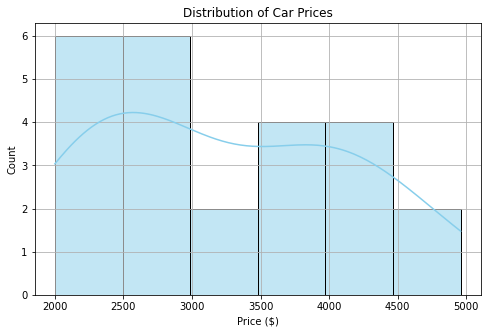

In [11]:
#3. Analyze the Distribution of Car Prices

# Summary statistics
print(df['Price'].describe())

# Histogram for price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


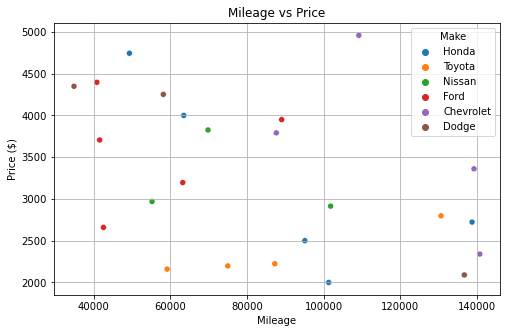

In [12]:
#4. Examine How Mileage Influences Price

# Scatter plot of Mileage vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Make', palette='tab10')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

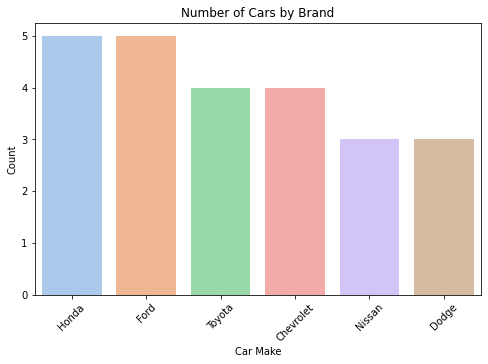

Text(0.5, 1.0, 'Number of Cars by Color')

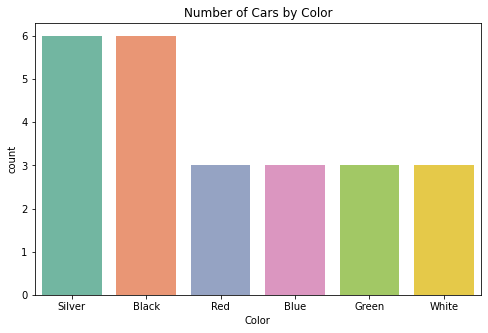

In [13]:
#5. Visualize the Number of Cars by Brand and Color

# Count of cars by Make
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Make', order=df['Make'].value_counts().index, palette='pastel')
plt.title('Number of Cars by Brand')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count of cars by Color
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Color', order=df['Color'].value_counts().index, palette='Set2')
plt.title('Number of Cars by Color')


Average profit by Make:
 Make
Honda        693.600000
Nissan       570.000000
Ford         551.600000
Dodge        463.666667
Chevrolet    362.750000
Toyota       295.000000
Name: Profit, dtype: float64


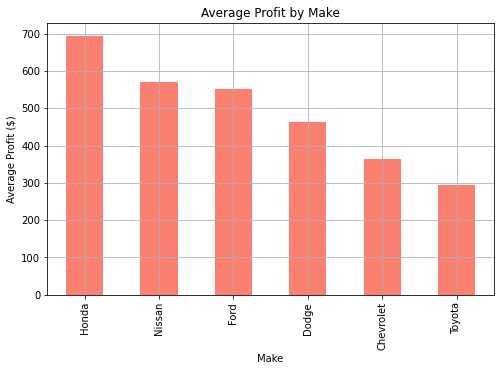

In [14]:
#6. Identify Important Insights for Pricing and Inventory

# Add a new column for Profit
df['Profit'] = df['Price'] - df['Cost']

# Average profit by car brand
avg_profit_by_make = df.groupby('Make')['Profit'].mean().sort_values(ascending=False)
print("Average profit by Make:\n", avg_profit_by_make)

# Plot average profit by Make
plt.figure(figsize=(8, 5))
avg_profit_by_make.plot(kind='bar', color='salmon')
plt.title('Average Profit by Make')
plt.xlabel('Make')
plt.ylabel('Average Profit ($)')
plt.grid(True)
plt.show()

In [15]:
#Export Cleaned Dataset (Optional)

# Save the cleaned dataset
df.to_csv('Cleaned_Car_Inventory.csv', index=False)